In [50]:
# importing dataset from kaggle 
# kaggle datasets download -d sukhmandeepsinghbrar/house-prices-india --unzip

In [51]:
# lets import the required libraries now that the dataset is downloaded
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
# lets load the dataset
df = pd.read_csv('House Price India.csv')

In [53]:
# lets look at the data 
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [55]:
# Lets drop the cols we are sure to drop 
df.drop(["id","Date"], inplace = True, axis = 1)

In [56]:
df.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,7.682263,1801.676654,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,1.174917,833.737588,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


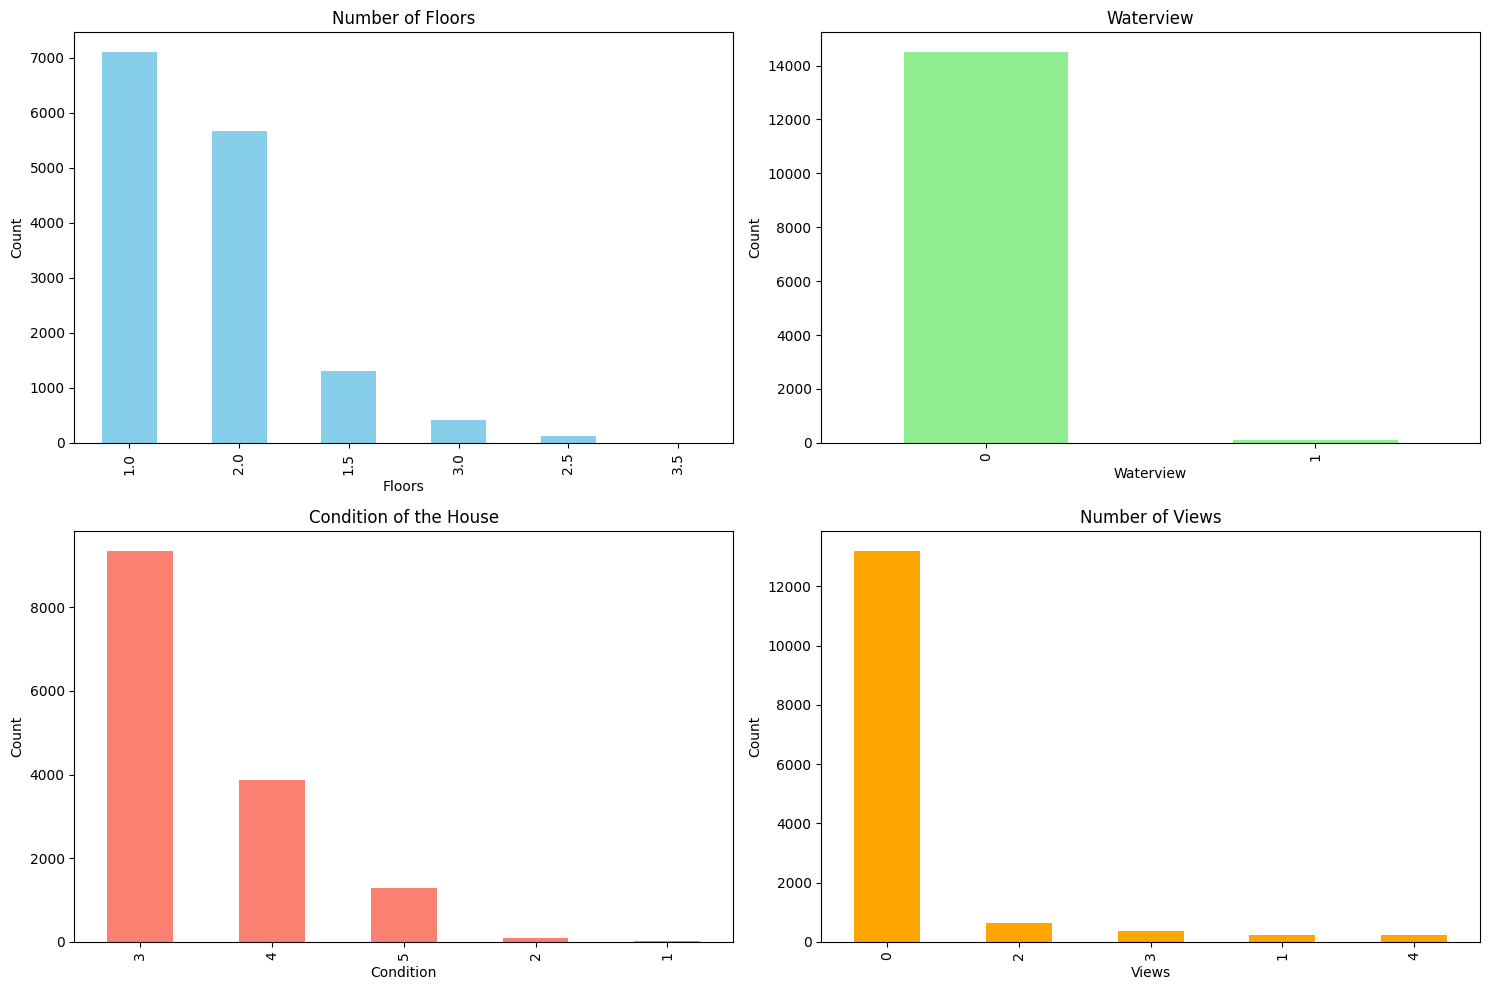

In [57]:
# Plotting the bar graphs
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Number of floors
df['number of floors'].value_counts().plot(kind='bar', ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Number of Floors')
axs[0, 0].set_xlabel('Floors')
axs[0, 0].set_ylabel('Count')

# Waterview
df['waterfront present'].value_counts().plot(kind='bar', ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title('Waterview')
axs[0, 1].set_xlabel('Waterview')
axs[0, 1].set_ylabel('Count')

# Condition of the house
df['condition of the house'].value_counts().plot(kind='bar', ax=axs[1, 0], color='salmon')
axs[1, 0].set_title('Condition of the House')
axs[1, 0].set_xlabel('Condition')
axs[1, 0].set_ylabel('Count')

# Number of views
df['number of views'].value_counts().plot(kind='bar', ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Number of Views')
axs[1, 1].set_xlabel('Views')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


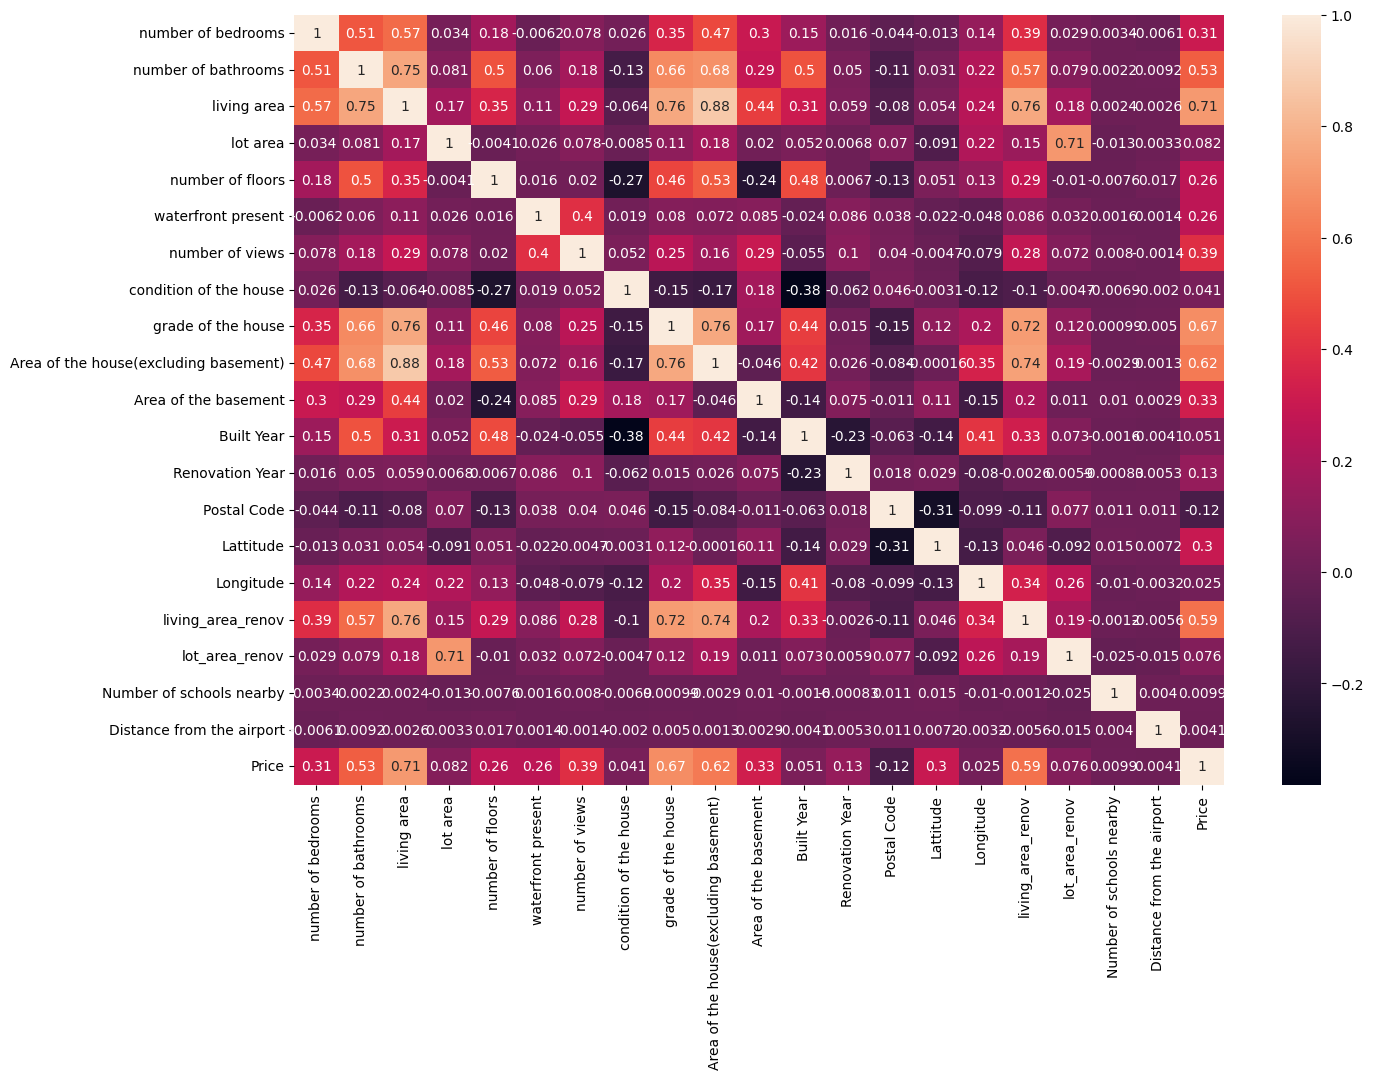

In [58]:
# lets check the correlation of the data   

plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [59]:
# well let pick the data we will use
df_x = df[['number of bedrooms','number of bathrooms','living area', 'number of floors','Area of the basement','living_area_renov']]

In [44]:
df_y = df['Price']

In [60]:
# low lets scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df_x_trans = scaler.fit_transform(df_x)
df_y_trans = scaler.fit_transform(df_y.values.reshape(-1,1))

In [63]:
# now lets take the numopy array and convertback to dataframe
df_x_trans = pd.DataFrame(data = df_x_trans, columns = df_x.columns)
df_y_trans = pd.DataFrame(data=df_y, columns = ['Price'])

In [67]:
# now lets split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_x_trans, df_y_trans, test_size=0.2, random_state=42)

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the decision tree model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

Mean Squared Error: 114608304553.00197
Mean Absolute Error: 208686.79973210217
R-squared Score: 0.2255990086663029
